# This notebook is prepared by ApplAi's Technical And Training Depratment.
- Please Don't use it outside the training without asking for permission as it's considered as Violation of Intellectual property rights

![ApplAi's Logo](https://media-exp1.licdn.com/dms/image/C4E0BAQHGLGltI2rzuQ/company-logo_200_200/0?e=2159024400&v=beta&t=adq8rNV09dPC6egdJMnfARt6Aq0TC9bSomFvFtm50WM)

### Task 1: Importing libraries and Exploring the Dataset.

### Task 2: Definining Exploratory Data Analysis with an overview of the whole project .

### Task 3: Checking missing values and Outliers & Creating visual methods to analyze the data.

### Task 4: creat a model that fits the data

### Task 5: creating an accurecy table


###

### Task 1: Importing libraries and Exploring the Dataset.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

### Task 2: Definining Exploratory Data Analysis with an overview of the whole project

In [3]:
df = pd.read_csv('D:\Project\water_potability.csv')

In [4]:
df.shape

(3276, 10)

In [5]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [6]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [7]:
df.info

<bound method DataFrame.info of             ph    Hardness        Solids  Chloramines     Sulfate  \
0          NaN  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246         NaN   
2     8.099124  224.236259  19909.541732     9.275884         NaN   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   
3273  9.419510  175.762646  33155.578218     7.350233         NaN   
3274  5.126763  230.603758  11983.869376     6.303357         NaN   
3275  7.874671  195.102299  17404.177061     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135

<Axes: >

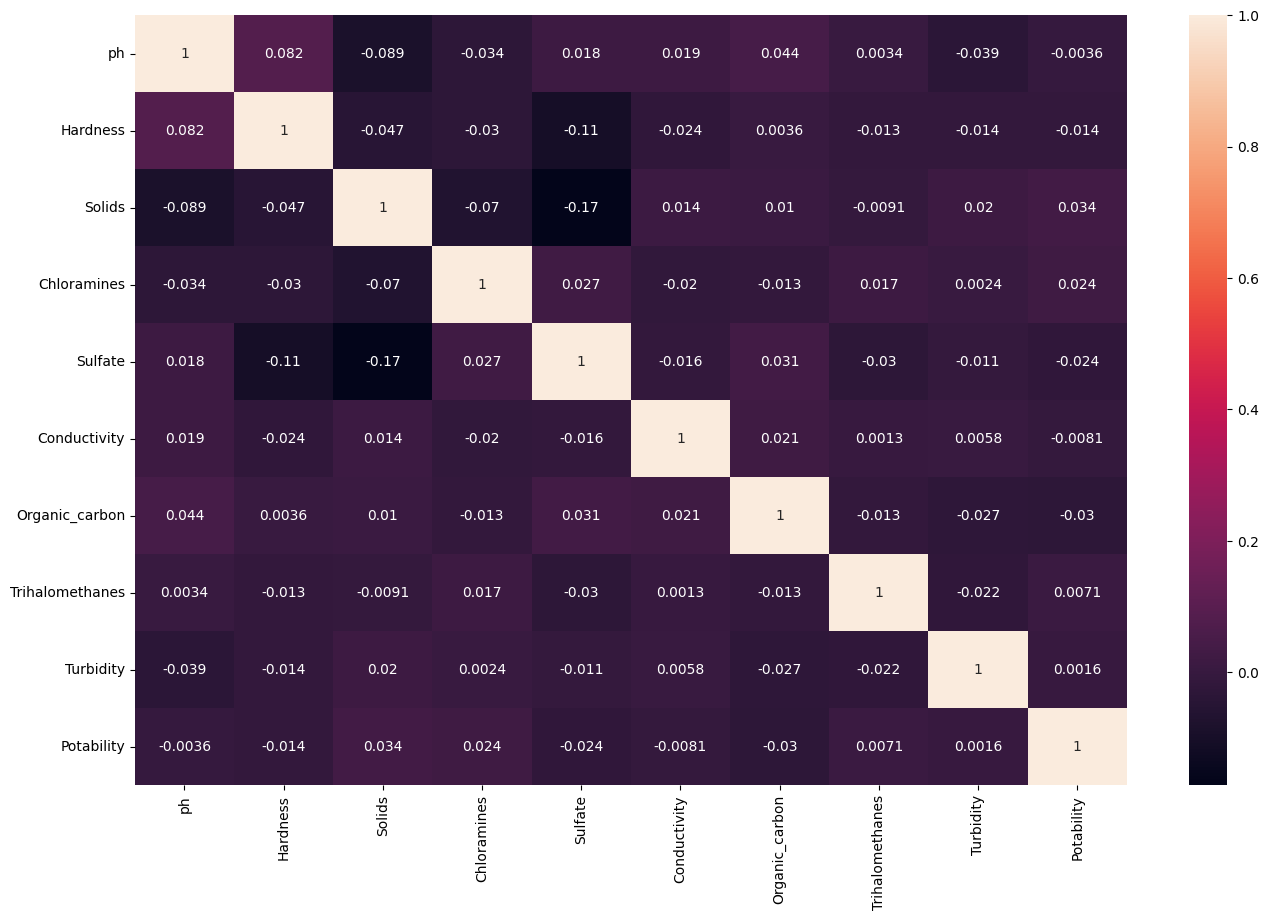

In [8]:
correlation = df.corr()
correlation
plt.figure(figsize=(16, 10))
sns.heatmap(correlation, annot=True)



### Task 3: Checking missing values and Outliers & Creating visual methods to analyze the data.

In [9]:
df.duplicated().sum()

0

In [10]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [11]:
df['ph'] = df['ph'].fillna(df['ph'].mean())
df['Sulfate'] = df['Sulfate'].fillna(df['Sulfate'].mean())
df['Trihalomethanes'] = df['Trihalomethanes'].fillna(df['Trihalomethanes'].mean())
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [12]:
df.Potability.value_counts()

Potability
0    1998
1    1278
Name: count, dtype: int64

<Axes: ylabel='count'>

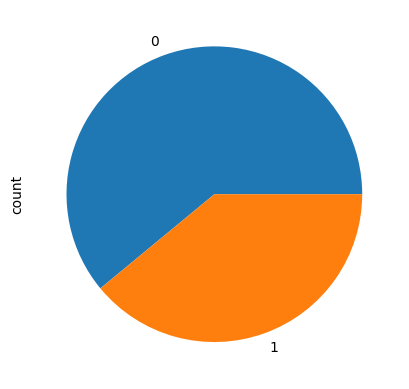

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns


df.Potability.value_counts().plot(kind ='pie')

<Axes: ylabel='count'>

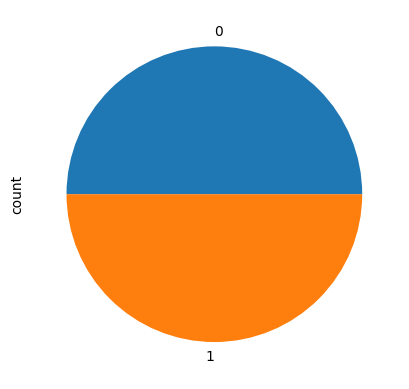

In [14]:
#using the unsampling method to make the data non biased (منحازة)
row_zero  = df[df['Potability']==0]
row_one = df[df['Potability']==1]
from sklearn.utils import resample
from sklearn.utils import shuffle
#minority class that  is 1, we need to upsample/increase that class so that there is no bias
#we want 1998 sample of class 1, since there are 1998 samples of class 0
df_minority_upsampled = resample(row_one, replace = True, n_samples = 1998) #this is called over sampling
df = pd.concat([row_zero, df_minority_upsampled])

df = shuffle(df)

#visulize the data
df.Potability.value_counts().plot(kind ='pie')

c:\Users\salah\anaconda3\envs\WaterQuality\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\salah\anaconda3\envs\WaterQuality\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\salah\anaconda3\envs\WaterQuality\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\salah\anaconda3\envs\WaterQuality\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. 

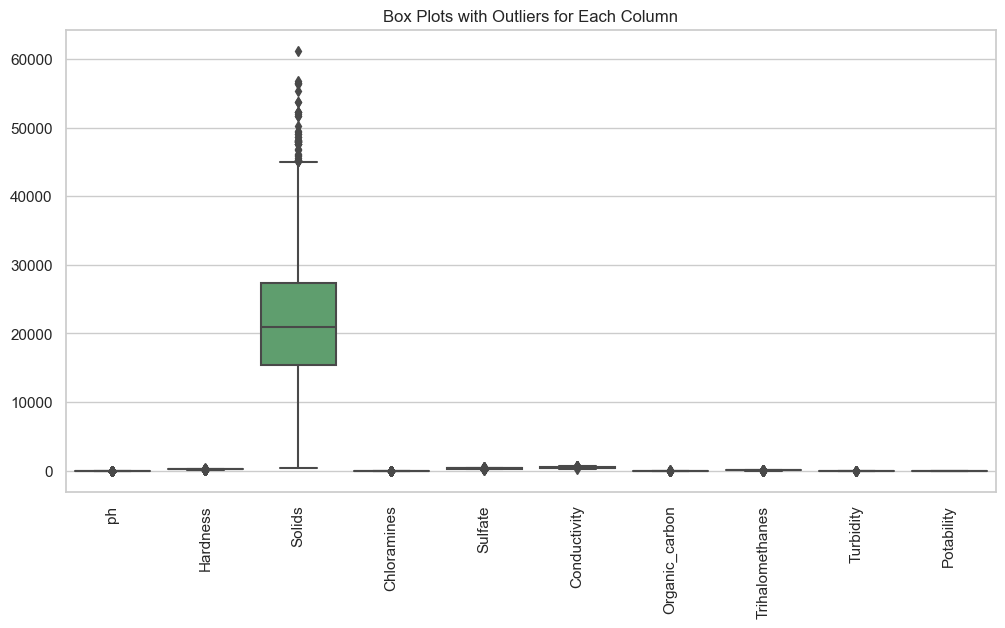

In [15]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title("Box Plots with Outliers for Each Column")
plt.show()
#boxplot shows that there isnt that much outliers

### Task 4: creat a model that fits the data

In [16]:
#Importing all the needed librarys
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [17]:
#choosing the target column "potability"
X = df.drop(['Potability'], axis = 1)
y = df['Potability']

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
features= X.columns
X[features] = sc.fit_transform(X[features])

In [19]:
#Implementing the train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2,random_state=42)

In [20]:
Logi_reg = LogisticRegression(random_state=42)

knn = KNeighborsClassifier()

Randf = RandomForestClassifier()

para_knn = {'n_neighbors':np.arange(1, 50)}  #parameters of knn
grid_knn = GridSearchCV(knn, param_grid=para_knn, cv=5) #search knn for 5 fold cross validation

params_Randf = {'n_estimators':[100,200, 350, 500], 'min_samples_leaf':[2, 10, 30]}
grid_Randf = GridSearchCV(Randf, param_grid=params_Randf, cv=5)

grid_knn.fit(X_train, y_train)
grid_Randf.fit(X_train, y_train)

print("Best parameters for KNN:", grid_knn.best_params_)
print("Best parameters for Random Forest:", grid_Randf.best_params_)

Best parameters for KNN: {'n_neighbors': 1}
Best parameters for Random Forest: {'min_samples_leaf': 2, 'n_estimators': 350}


In [48]:
Logi_reg = LogisticRegression(random_state=42)
knn = KNeighborsClassifier(n_neighbors=1)
Randf = RandomForestClassifier(n_estimators=350, min_samples_leaf=2, random_state=42)

In [49]:
classifiers = [('Logistic Regression', Logi_reg), ('K Nearest Neighbours', knn),('Random Forest', Randf)]

In [50]:
from sklearn.metrics import accuracy_score

for classifier_name, classifier in classifiers:

    # Fit clf to the training set
    classifier.fit(X_train, y_train)

    # Predict y_pred
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)



    # Evaluate clf's accuracy on the test set
    print('{:s} : {:.2f}'.format(classifier_name, accuracy))

Logistic Regression : 0.53
K Nearest Neighbours : 0.78
Random Forest : 0.82


### Task 5: creating an accurecy table

In [46]:
from sklearn.metrics import classification_report

y_pred_Randf= Randf.predict(X_test)
print(classification_report(y_test, y_pred_Randf))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       412
           1       0.82      0.81      0.82       388

    accuracy                           0.82       800
   macro avg       0.82      0.82      0.82       800
weighted avg       0.82      0.82      0.82       800



In [47]:
import joblib
joblib_file="Water_Quality_Project"
joblib.dump(Randf,joblib_file)

loaded_model = joblib.load(open(joblib_file,'rb'))
y_pred = loaded_model.predict(X_test)
results = np.round(accuracy_score(y_test,y_pred),2)
print(results)

0.82
